# Finding roots using fixed point iterations

---

code written by Konstantinos Theofilatos on 2019.30.07

---
For the sake of the example, let's use a simple quadratic polynomial $f (x) \equiv x^2 - 11x + 25$. 
There are 2 real roots of $f(x)=0$ equation. To find them using fixed point iteration,  we consider that

$x^2 - 11x + 25 = 0 $ 

$x^2 - 10x + 25 = x $

$(x - 5)^2 = x $

which implies that:

$ x = 5 + \sqrt{x} \equiv g(x)$ 

*or*

$ x = 5 - \sqrt{x} \equiv h(x) $ 

In fact, there is no unique way to morph a generic $f(x) = 0$ in a form of $x = g(x)$. We can now try to implement these as fixed point iteration formulas:

$x_{n+1} = g(x_n)$ 

$x_{n+1} = h(x_n)$

and see if they work.



In [1]:
def f(x): return x**2 - 11*x + 25
def g(x): return 5 + x**0.5
def h(x): return 5 - x**0.5
x = 3.0 # initial value 
n = 0
while (n < 20): # try 20 iterations
  x = g(x)
  n = n + 1
print ('for x = ', x, 'g(x) = ', g(x), 'and f(x) = ', f(x))

# now repeat for the x = h(x) iteration scheme
x = 3.0 # initial value 
n = 0
while (n < 20): 
  x = h(x)
  n = n + 1
print ('for x = ', x, 'h(x) = ', h(x), 'and f(x) = ', f(x))

for x =  7.791287847477912 g(x) =  7.791287847477919 and f(x) =  -3.552713678800501e-14
for x =  3.208712152520337 h(x) =  3.2087121525225664 and f(x) =  7.986500349943526e-12


# Graphical approach

Now let's try to find the roots of $x^2 - 11x + 25 = 0$, using brute force of a graphical approach.
Let's set the desired precision to $10^{-5}$ to get an idea of $f(x)$ and later on, attempt to determine the roots, with the same level of precision $O(10^{-12})$ we achived using just 20 fixed-point iterations. 

In [0]:
import matplotlib.pyplot as plt
import numpy as np

[2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5 3.6 3.7
 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3 5.4 5.5
 5.6 5.7 5.8 5.9 6.  6.1 6.2 6.3 6.4 6.5 6.6 6.7 6.8 6.9 7.  7.1 7.2 7.3
 7.4 7.5 7.6 7.7 7.8 7.9 8.  8.1 8.2 8.3 8.4 8.5 8.6 8.7 8.8 8.9 9. ]


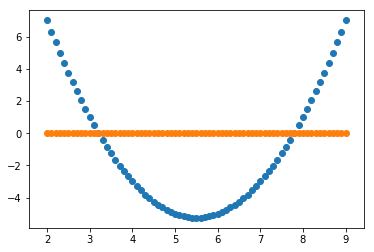

In [3]:
# to have precision up to 0.1 for x in [2,9] we need 71 evenly spaced samples
x_n = np.linspace(2,9,71)  
print(x_n) 
plt.scatter(x_n, f(x_n))
plt.scatter(x_n, [0.0 for ii in range(len(x_n))])

Now let's try to have precision of $10^{-12}$ for $x$ in $[2,9]$, we need  $(9-2)/10^{-12} + 1$, which is roughly $7\times10^{-12}$ evenly spaced samples. Code to do this is given below, be invited to run it on your own to see how much time we need to locate the roots using brute force attack.

In [0]:
x_n = np.linspace(2,9, int(7*10**1 + 1))  
print(x_n) 
plt.scatter(x_n, f(x_n))
plt.scatter(x_n, [0.0 for ii in range(len(x_n))])